!pip install tensorflow
!pip install keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
import re
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from matplotlib.pyplot import figure

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kirilltiufanov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
all_data = pd.read_csv("data/all_data_for_lstm.csv")

In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2791 entries, 0 to 2790
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            2791 non-null   object 
 1   time.1          2791 non-null   int64  
 2   replies_count   2791 non-null   float64
 3   retweets_count  2791 non-null   float64
 4   top_tw          2791 non-null   int64  
 5   likes_count     2791 non-null   float64
 6   subj            2791 non-null   float64
 7   polar           2791 non-null   float64
 8   top_score       2791 non-null   float64
 9   open            2791 non-null   float64
 10  high            2791 non-null   float64
 11  low             2791 non-null   float64
 12  close           2791 non-null   float64
 13  Volume          2791 non-null   float64
dtypes: float64(11), int64(2), object(1)
memory usage: 305.4+ KB


In [4]:
all_data["time"] = all_data["time"].astype(str)
all_data["time.1"] = all_data["time.1"].astype(str)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2791 entries, 0 to 2790
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            2791 non-null   object 
 1   time.1          2791 non-null   object 
 2   replies_count   2791 non-null   float64
 3   retweets_count  2791 non-null   float64
 4   top_tw          2791 non-null   int64  
 5   likes_count     2791 non-null   float64
 6   subj            2791 non-null   float64
 7   polar           2791 non-null   float64
 8   top_score       2791 non-null   float64
 9   open            2791 non-null   float64
 10  high            2791 non-null   float64
 11  low             2791 non-null   float64
 12  close           2791 non-null   float64
 13  Volume          2791 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 305.4+ KB


In [5]:
all_data["index"] = all_data["time"] + all_data["time.1"]

In [6]:
all_data = all_data.set_index("index")

In [7]:
all_data = all_data.iloc[:, 3:]
all_data

,retweets_count,top_tw,likes_count,subj,polar,top_score,open,high,low,close,Volume
index,,,,,,,,,,,
2021-01-021,445.0,6,2523.0,0.271472,0.082867,1.843595e+01,0.006921,0.007172,0.006709,0.006770,29383228.0
2021-01-022,1092.0,9,14113.0,0.272197,0.108878,7.314342e+02,0.006767,0.007038,0.006641,0.006773,41415520.0
2021-01-023,917.0,13,7111.0,0.255490,0.084638,2.701301e+02,0.006780,0.007179,0.006745,0.007096,31058927.0
2021-01-024,978.0,13,5997.0,0.273800,0.091864,-4.909110e+01,0.007065,0.007421,0.007055,0.007287,31100758.0
2021-01-025,642.0,8,4139.0,0.306174,0.128929,7.767531e+02,0.007308,0.007315,0.006738,0.006990,57350444.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-2813,963.0,7,4413.0,0.327447,0.128172,1.551894e+04,0.308670,0.312000,0.303860,0.310110,15921899.2
2021-04-2814,1311.0,5,3182.0,0.311805,0.136751,4.765066e+04,0.310310,0.310760,0.301330,0.306520,19680380.6
2021-04-2815,861.0,3,2090.0,0.352951,0.143377,6.823856e+02,0.306520,0.315320,0.304800,0.310570,20889588.2


In [8]:
all_data

,retweets_count,top_tw,likes_count,subj,polar,top_score,open,high,low,close,Volume
index,,,,,,,,,,,
2021-01-021,445.0,6,2523.0,0.271472,0.082867,1.843595e+01,0.006921,0.007172,0.006709,0.006770,29383228.0
2021-01-022,1092.0,9,14113.0,0.272197,0.108878,7.314342e+02,0.006767,0.007038,0.006641,0.006773,41415520.0
2021-01-023,917.0,13,7111.0,0.255490,0.084638,2.701301e+02,0.006780,0.007179,0.006745,0.007096,31058927.0
2021-01-024,978.0,13,5997.0,0.273800,0.091864,-4.909110e+01,0.007065,0.007421,0.007055,0.007287,31100758.0
2021-01-025,642.0,8,4139.0,0.306174,0.128929,7.767531e+02,0.007308,0.007315,0.006738,0.006990,57350444.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-2813,963.0,7,4413.0,0.327447,0.128172,1.551894e+04,0.308670,0.312000,0.303860,0.310110,15921899.2
2021-04-2814,1311.0,5,3182.0,0.311805,0.136751,4.765066e+04,0.310310,0.310760,0.301330,0.306520,19680380.6
2021-04-2815,861.0,3,2090.0,0.352951,0.143377,6.823856e+02,0.306520,0.315320,0.304800,0.310570,20889588.2


Text(0.5, 0, '')

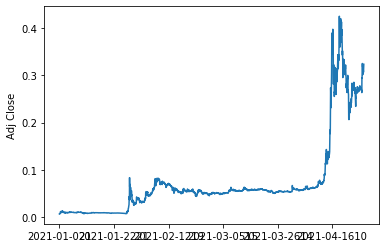

In [9]:
all_data['close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)

Text(0.5, 0, '')

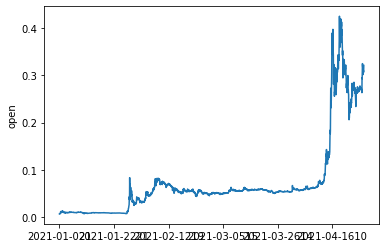

In [10]:
all_data['open'].plot()
plt.ylabel('open')
plt.xlabel(None)

Text(0.5, 0, '')

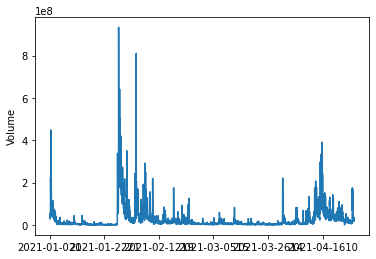

In [11]:
all_data['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)

In [12]:
ma_hour = [10, 20, 50]

for ma in ma_hour:
    column_name = f"MA for {ma} hours"
    all_data[column_name] = all_data['close'].rolling(ma).mean()

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2791 entries, 2021-01-021 to 2021-04-2817
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   retweets_count   2791 non-null   float64
 1   top_tw           2791 non-null   int64  
 2   likes_count      2791 non-null   float64
 3   subj             2791 non-null   float64
 4   polar            2791 non-null   float64
 5   top_score        2791 non-null   float64
 6   open             2791 non-null   float64
 7   high             2791 non-null   float64
 8   low              2791 non-null   float64
 9   close            2791 non-null   float64
 10  Volume           2791 non-null   float64
 11  MA for 10 hours  2782 non-null   float64
 12  MA for 20 hours  2772 non-null   float64
 13  MA for 50 hours  2742 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 327.1+ KB


<AxesSubplot:xlabel='index'>

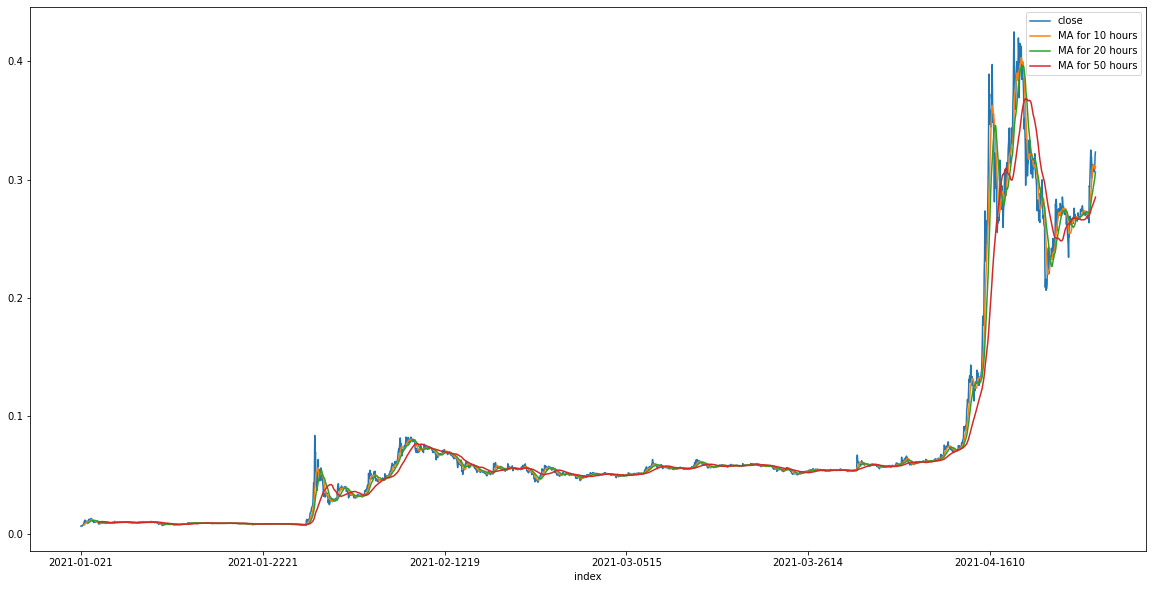

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
all_data[['close', 'MA for 10 hours', 'MA for 20 hours', 'MA for 50 hours']].plot()


In [15]:
all_data.dropna(inplace=True)

In [16]:
X = all_data.drop(columns='close')
y = all_data['close']
dataset = X.to_numpy()

In [17]:
dataset

array([[2.330000e+02, 1.000000e+00, 7.060000e+02, ..., 1.014580e-02,
        1.048470e-02, 1.027646e-02],
       [3.110000e+02, 2.000000e+00, 1.076000e+03, ..., 9.994100e-03,
        1.030385e-02, 1.031472e-02],
       [6.550000e+02, 1.000000e+00, 1.635000e+03, ..., 9.834000e-03,
        1.012425e-02, 1.035660e-02],
       ...,
       [8.610000e+02, 3.000000e+00, 2.090000e+03, ..., 3.094240e-01,
        3.009320e-01, 2.829402e-01],
       [3.004000e+03, 5.000000e+00, 1.342700e+04, ..., 3.095530e-01,
        3.035115e-01, 2.840342e-01],
       [5.958000e+03, 4.000000e+01, 3.140400e+04, ..., 3.108620e-01,
        3.063300e-01, 2.852030e-01]])

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [19]:
scaled_data

array([[0.0016974 , 0.00337838, 0.00077811, ..., 0.00672211, 0.0073241 ,
        0.00637169],
       [0.00228323, 0.00675676, 0.00119476, ..., 0.00633877, 0.00685909,
        0.00647783],
       [0.00486687, 0.00337838, 0.00182423, ..., 0.00593419, 0.00639729,
        0.00659401],
       ...,
       [0.00641406, 0.01013514, 0.00233659, ..., 0.76300282, 0.75413882,
        0.76281033],
       [0.02250929, 0.01689189, 0.01510279, ..., 0.76332881, 0.76077138,
        0.76584536],
       [0.04469563, 0.13513514, 0.03534606, ..., 0.76663667, 0.76801847,
        0.76908791]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train, columns =['close'])
y_test  = pd.DataFrame(y_test, columns =['close'])

In [21]:
x_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2022-12-14 15:14:11.179214: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 15:14:25.546439: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1919/1919 [==============================] - 23s 10ms/step - loss: 0.0045


In [26]:

    
# Convert the data to a numpy array
x_test = np.array(X_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
#predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


26/26 [==============================] - 1s 9ms/step


/Users/kirilltiufanov/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


close    0.024669
dtype: float64

In [ ]:
predictions

In [ ]:
model.weights

In [ ]:
all_data_num = all_data.drop(["tweetl_t", "tweetl_l", "mentions_t", "mentions_l"], axis=1)

In [ ]:
all_data_num

In [ ]:
all_data_num = all_data_num.iloc[:,2:-1].apply(pd.to_numeric)

In [ ]:
y_train["tv"].value_counts()

In [ ]:
sns.countplot(x=y_train['tv'])

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y.value_counts()

In [ ]:
#checking features with high importancy
from sklearn.feature_selection import RFE
data_final_vars = all_data_num.columns.values.tolist()
rfc = RandomForestClassifier()
rfe = RFE(rfc, n_features_to_select=20)
rfe = rfe.fit(X_sm, y_sm.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
#droping features selected by RFE
boolencolm = rfe.support_
X_sm = pd.DataFrame(X_sm).loc[:, boolencolm]
X_test = pd.DataFrame(X_test).loc[:, boolencolm]

In [ ]:
X_sm.head()

In [ ]:

nb = CategoricalNB()
rfc = RandomForestClassifier()

nb.fit(X_sm, y_sm['tv'])
rfc.fit(X_sm, y_sm['tv'])

In [ ]:
y_train_res_pred_rf = rfc.predict(X_sm)
y_test_pred_rf      = rfc.predict(X_test)

In [ ]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))


In [ ]:
model_performance_class(y_sm, y_train_res_pred_rf, y_test, y_test_pred_rf)